In [1]:
#!pip install tsfel
from tsfel.feature_extraction import features as tsfelf
import numpy as np
from scipy import signal
import pandas as pd
import glob
import sklearn
from scipy.io import wavfile
from scipy.signal import decimate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
source_samp_rate=44100
decimation_factor = 4

#Preprocessing.
Filtration and feature extraction

In [3]:
def hpf(arr,fs,lf,order):
    wbut = lf
    bbut, abut = signal.butter(order,wbut, btype='highpass', fs=fs)
    return signal.filtfilt(bbut, abut, arr)

def get_features(sig,label,fs = 44100):
    
    features = ["RMS", "RMS_filt", "Spectral_centroid", "Spectral_centroid_filt",\
                "Zero-Cross", "Zero-Cross_filt", "Spectral_slope", \
                    "Spectral_slope_filt", "Spectral_spread", \
                        "Spectral_spread_filt", "STD", "STD_filt"]

        
    s_f = hpf(sig, fs, 65, 2)
    RMS = tsfelf.rms(sig)
    RMS_filt= tsfelf.rms(s_f)
    
    Zero_Cross = tsfelf.zero_cross(sig)
    Zero_Cross_filt = tsfelf.zero_cross(s_f)
            
    Spectral_centroid = tsfelf.spectral_centroid(sig, fs)
    Spectral_centroid_filt = tsfelf.spectral_centroid(s_f, fs)
            
    Spectral_slope = tsfelf.spectral_slope(sig, fs)
    Spectral_slope_filt = tsfelf.spectral_slope(s_f, fs) 
            
    Spectral_spread = tsfelf.spectral_spread(sig, fs)
    Spectral_spread_filt = tsfelf.spectral_spread(s_f, fs) 
            
    STD = np.std(sig)
            
    STD_filt = np.std(s_f)

    return [label, RMS, RMS_filt, Zero_Cross, Zero_Cross_filt, Spectral_centroid, 
     Spectral_centroid_filt,Spectral_slope, Spectral_slope_filt, Spectral_spread, Spectral_spread_filt,  
      STD, STD_filt]

In [4]:
def get_features_from_folder(folder_path,label,decimation_factor):
    files=glob.glob(folder_path+"/*.wav")
    print(files)
    features_array = []
    for file_path in files:
        samplerate, sdata=wavfile.read(file_path)
        decimated_data=decimate(sdata,decimation_factor)
        sample1=decimated_data[0:int(samplerate/decimation_factor*3-1)]
        sample2=decimated_data[int(samplerate/decimation_factor*3):int(samplerate/decimation_factor*6-1)]
        sample3=decimated_data[int(samplerate/decimation_factor*6):int(samplerate/decimation_factor*9-1)]
        features1=get_features(sample1,label,samplerate/decimation_factor)
        features2=get_features(sample2,label,samplerate/decimation_factor)
        features3=get_features(sample3,label,samplerate/decimation_factor)
        features_array.append(features1)
        features_array.append(features2)
        features_array.append(features3)
    return features_array


In [5]:
wg_path = "C:\\Users\\AtteR\\Desktop\\Wet gravel"
dg_path = "C:\\Users\\AtteR\\Desktop\\Dry gravel"
da_path = "C:\\Users\\AtteR\\Desktop\\Dry asphalt"
wa_path = "C:\\Users\\AtteR\\Desktop\\Wet asphalt"
ice_path="C:\\Users\\AtteR\\Desktop\\Ice"
wg_features=np.asarray(get_features_from_folder(wg_path,"Wet gravel",decimation_factor))
dg_features=np.asarray(get_features_from_folder(dg_path,"Dry gravel",decimation_factor))
da_features=np.asarray(get_features_from_folder(da_path,"Dry asphalt",decimation_factor))
wa_features=np.asarray(get_features_from_folder(wa_path,"Wet asphalt",decimation_factor))
ice_features=np.asarray(get_features_from_folder(ice_path,"Ice",decimation_factor))

['C:\\Users\\AtteR\\Desktop\\Wet gravel\\2021_14_51_45-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet gravel\\2021_14_51_56-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet gravel\\2021_14_52_06-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet gravel\\2021_14_52_16-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet gravel\\2021_14_52_26-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet gravel\\2021_14_52_36-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet gravel\\2021_14_52_47-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet gravel\\2021_14_52_57-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet gravel\\2021_14_53_07-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet gravel\\2021_14_53_17-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet gravel\\2021_14_53_27-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet gravel\\2021_15_04_50-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet gravel\\2021_15_05_00-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet gravel\\2021_15_05_10-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet gravel\\2021_15_05_21-Nov-10.

['C:\\Users\\AtteR\\Desktop\\Wet asphalt\\2021_14_54_08-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet asphalt\\2021_14_54_18-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet asphalt\\2021_14_54_28-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet asphalt\\2021_14_54_39-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet asphalt\\2021_14_54_49-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet asphalt\\2021_14_54_59-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet asphalt\\2021_14_55_09-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet asphalt\\2021_14_55_19-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet asphalt\\2021_14_55_30-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet asphalt\\2021_14_55_40-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet asphalt\\2021_14_55_50-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet asphalt\\2021_14_56_00-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet asphalt\\2021_14_56_10-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet asphalt\\2021_14_56_20-Nov-10.wav', 'C:\\Users\\AtteR\\Desktop\\Wet asphalt\\2021_1

['C:\\Users\\AtteR\\Desktop\\Ice\\2022_14_51_14-Jan-13.wav', 'C:\\Users\\AtteR\\Desktop\\Ice\\2022_14_51_24-Jan-13.wav', 'C:\\Users\\AtteR\\Desktop\\Ice\\2022_14_51_34-Jan-13.wav', 'C:\\Users\\AtteR\\Desktop\\Ice\\2022_14_51_45-Jan-13.wav', 'C:\\Users\\AtteR\\Desktop\\Ice\\2022_14_56_20-Jan-13.wav', 'C:\\Users\\AtteR\\Desktop\\Ice\\2022_14_56_30-Jan-13.wav', 'C:\\Users\\AtteR\\Desktop\\Ice\\2022_14_57_21-Jan-13.wav', 'C:\\Users\\AtteR\\Desktop\\Ice\\2022_14_57_31-Jan-13.wav', 'C:\\Users\\AtteR\\Desktop\\Ice\\2022_14_59_03-Jan-13.wav', 'C:\\Users\\AtteR\\Desktop\\Ice\\2022_14_59_13-Jan-13.wav', 'C:\\Users\\AtteR\\Desktop\\Ice\\2022_14_59_23-Jan-13.wav', 'C:\\Users\\AtteR\\Desktop\\Ice\\2022_14_59_34-Jan-13.wav', 'C:\\Users\\AtteR\\Desktop\\Ice\\2022_14_59_44-Jan-13.wav', 'C:\\Users\\AtteR\\Desktop\\Ice\\2022_15_00_14-Jan-13.wav']


In [6]:
print(len(wg_features),len(dg_features),len(da_features),len(wa_features),len(ice_features))

93 246 1176 483 42


In [7]:
all_features=np.concatenate((wg_features,dg_features,da_features,wa_features,ice_features))

In [8]:
columnlist=["Label","RMS", "RMS_filt", "Spectral_centroid", "Spectral_centroid_filt",\
                "Zero-Cross", "Zero-Cross_filt", "Spectral_slope", \
                    "Spectral_slope_filt", "Spectral_spread", \
                        "Spectral_spread_filt", "STD", "STD_filt"]
roadtype_features_df=pd.DataFrame(all_features,columns=columnlist)
roadtype_features_df.head()

,Label,RMS,RMS_filt,Spectral_centroid,Spectral_centroid_filt,Zero-Cross,Zero-Cross_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
0,Wet gravel,121.36131809749838,85.66330485275074,1214,1823,706.9415625251071,809.972502854982,-4.8933685023070076e-08,-4.647319707918017e-08,892.8185297524504,921.568378125202,121.36056846669014,85.66330138684029
1,Wet gravel,121.90214827468019,85.40397070703878,1848,2742,932.7300968143064,1058.8196428804586,-4.3541615760104636e-08,-4.053046389685839e-08,1101.399680725606,1121.3505005573843,121.90049301208536,85.40396706413705
2,Wet gravel,143.28180471309255,105.14578176416187,3565,5045,1296.9443048741527,1440.8023292284233,-3.484379484285918e-08,-3.1408312904887706e-08,1250.8410036799442,1237.9137111956707,143.28178096470862,105.14576505054569
3,Wet gravel,178.57684499761723,131.94747599701756,3382,4469,1170.1359729761057,1333.2253123851224,-3.7872112072819084e-08,-3.397736596928871e-08,1232.239102502508,1234.1362104420862,178.5766307977514,131.9474702286461
4,Wet gravel,329.4445975085013,265.59582849115066,4865,6218,1467.4235617340914,1604.4018246404044,-3.0772569686181085e-08,-2.75013837358551e-08,1330.6052972625894,1315.9158175468494,329.444252396269,265.595823619754


In [9]:
print(len(roadtype_features_df))
roadtype_features_df = roadtype_features_df.dropna()
print(len(roadtype_features_df))

2040
2040


In [10]:
y=roadtype_features_df["Label"]
print(len(y))
features=["RMS", "RMS_filt", "Spectral_centroid", "Spectral_centroid_filt",\
                "Zero-Cross", "Zero-Cross_filt", "Spectral_slope", \
                    "Spectral_slope_filt", "Spectral_spread", \
                        "Spectral_spread_filt", "STD", "STD_filt"]
X=roadtype_features_df[features]
X.head()

2040


,RMS,RMS_filt,Spectral_centroid,Spectral_centroid_filt,Zero-Cross,Zero-Cross_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
0,121.36131809749838,85.66330485275074,1214,1823,706.9415625251071,809.972502854982,-4.8933685023070076e-08,-4.647319707918017e-08,892.8185297524504,921.568378125202,121.36056846669014,85.66330138684029
1,121.90214827468019,85.40397070703878,1848,2742,932.7300968143064,1058.8196428804586,-4.3541615760104636e-08,-4.053046389685839e-08,1101.399680725606,1121.3505005573843,121.90049301208536,85.40396706413705
2,143.28180471309255,105.14578176416187,3565,5045,1296.9443048741527,1440.8023292284233,-3.484379484285918e-08,-3.1408312904887706e-08,1250.8410036799442,1237.9137111956707,143.28178096470862,105.14576505054569
3,178.57684499761723,131.94747599701756,3382,4469,1170.1359729761057,1333.2253123851224,-3.7872112072819084e-08,-3.397736596928871e-08,1232.239102502508,1234.1362104420862,178.5766307977514,131.9474702286461
4,329.4445975085013,265.59582849115066,4865,6218,1467.4235617340914,1604.4018246404044,-3.0772569686181085e-08,-2.75013837358551e-08,1330.6052972625894,1315.9158175468494,329.444252396269,265.595823619754


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True, stratify=y)

KNN confusion matrix


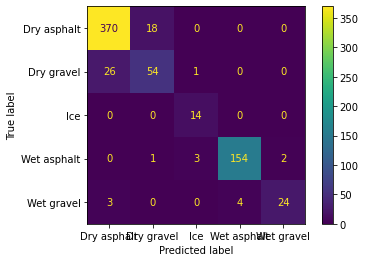

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("KNN confusion matrix")
plot_confusion_matrix(knn, x_test, y_test)


In [13]:
trues=0
for true,pred in zip(y_test,y_pred_knn):
    if(true==pred):
        trues=trues+1
print(trues/len(y_test))

0.913946587537092


Let's do some scaling

In [14]:
scaled_df=roadtype_features_df.copy()
scaler = preprocessing.StandardScaler()
scaled_df[features]=scaler.fit_transform(scaled_df[features])
scaled_df.head()

,Label,RMS,RMS_filt,Spectral_centroid,Spectral_centroid_filt,Zero-Cross,Zero-Cross_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
0,Wet gravel,-1.049234,-1.035090,-2.066931,-2.049002,-1.500317,-1.447758,-1.500317,-1.447758,-0.199132,0.123180,-1.049234,-1.035090
1,Wet gravel,-1.049143,-1.035136,-1.722492,-1.525337,-0.605744,-0.406427,-0.605744,-0.406427,1.631488,1.833405,-1.049143,-1.035136
2,Wet gravel,-1.045547,-1.031629,-0.789683,-0.213040,0.837269,1.192026,0.837269,1.192026,2.943065,2.831238,-1.045546,-1.031629
3,Wet gravel,-1.039609,-1.026868,-0.889103,-0.541256,0.334856,0.741857,0.334856,0.741857,2.779805,2.798901,-1.039609,-1.026868
4,Wet gravel,-1.014231,-1.003124,-0.083421,0.455360,1.512707,1.876628,1.512707,1.876628,3.643119,3.498971,-1.014231,-1.003124


KNN_with_scaling confusion matrix


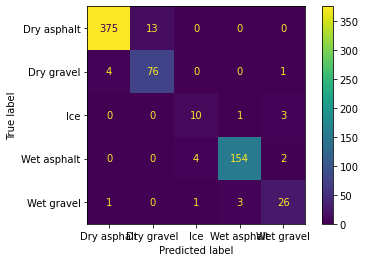

In [15]:
y=scaled_df["Label"]
X=scaled_df[features]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True, stratify=y)
knn_with_scaling = KNeighborsClassifier(n_neighbors=3)
knn_with_scaling.fit(x_train, y_train)
y_pred_knn = knn_with_scaling.predict(x_test)
print("KNN_with_scaling confusion matrix")
plot_confusion_matrix(knn_with_scaling, x_test, y_test)

In [16]:
trues=0
for true,pred in zip(y_test,y_pred_knn):
    if(true==pred):
        trues=trues+1
print(trues/len(y_test))

0.9510385756676558


In [18]:
filename="df-"+str(decimation_factor)+"_wl-3s_"+"19.1.2022.csv"
roadtype_features_df.to_csv(filename,index=False)